# **Codveda Technologies Internship For ML**

# Task 2: Support Vector Machine(SVM) for Classification

**Intern**-Muhammad Sakibur Rahaman

**Dataset**-*churn*-*bigml*-*80*.*csv*

**Objectives**:

* Train an SVM model on a labeled dataset.
* Use different kernels (linear, RBF) and compare
performance.
* Visualize the decision boundary.
* Evaluate the model using accuracy, precision, recall,
and AUC.
* Tools: Python, scikit-learn, pandas, matplotlib

**Description**: Implement a Support Vector Machine
(SVM) model for binary classification.



---



# 1.Drive Mount

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2.Import the relevant libraries

In [4]:
#python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report,confusion_matrix,f1_score
from sklearn.metrics import RocCurveDisplay
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')

In [5]:
!pip install scikit-learn matplotlib pandas mlxtend


# 3.Load Dataset

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/churn-bigml-80.csv')

# 4.Head of dataset

In [7]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 5.Drop column 'State' , 'Area code'


In [8]:
df=df.drop(['State','Area code'],axis=1)

In [9]:
df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 6.Shape of dataset

In [10]:
df.shape

(2666, 18)

# 7.Describe the Dataset

In [11]:
df.describe()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# 8.Encoding & change data type

In [12]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    else:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [13]:
df

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,125,0,1,18,265.1,68,45.07,197.4,59,16.78,244.7,48,11.01,10.0,3,2.70,1,0
1,104,0,1,19,161.6,81,27.47,195.5,63,16.62,254.4,60,11.45,13.7,3,3.70,1,0
2,134,0,0,0,243.4,72,41.38,121.2,70,10.30,162.6,61,7.32,12.2,5,3.29,0,0
3,81,1,0,0,299.4,29,50.90,61.9,48,5.26,196.9,46,8.86,6.6,7,1.78,2,0
4,72,1,0,0,166.7,71,28.34,148.3,82,12.61,186.9,78,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,76,0,0,0,134.7,56,22.90,189.7,28,16.12,221.4,85,9.96,11.8,5,3.19,2,0
2662,186,0,1,29,156.2,35,26.55,215.5,86,18.32,279.1,40,12.56,9.9,6,2.67,2,0
2663,65,0,0,0,231.1,15,39.29,153.4,15,13.04,191.3,80,8.61,9.6,4,2.59,3,0
2664,25,0,0,0,180.8,67,30.74,288.8,18,24.55,191.9,48,8.64,14.1,6,3.81,2,0


# 9.Dataset Information

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          2666 non-null   int64  
 1   International plan      2666 non-null   int64  
 2   Voice mail plan         2666 non-null   int64  
 3   Number vmail messages   2666 non-null   int64  
 4   Total day minutes       2666 non-null   float64
 5   Total day calls         2666 non-null   int64  
 6   Total day charge        2666 non-null   float64
 7   Total eve minutes       2666 non-null   float64
 8   Total eve calls         2666 non-null   int64  
 9   Total eve charge        2666 non-null   float64
 10  Total night minutes     2666 non-null   float64
 11  Total night calls       2666 non-null   int64  
 12  Total night charge      2666 non-null   float64
 13  Total intl minutes      2666 non-null   float64
 14  Total intl calls        2666 non-null   

# 10.Model Building

In [15]:
def evaluate_results(y_test, y_pred):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return accuracy, precision, recall, f1

# 11.Scaling & Split dataset

In [16]:
# Separate features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=92)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Use to_numpy() instead of numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

#Printing data shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2132, 17)
X_test shape: (534, 17)
y_train shape: (2132,)
y_test shape: (534,)


# 12.Support Vector Machine(SVM)Classification

Accuracy: 0.8857677902621723
Precision: 0.7845845782659316
Recall: 0.8857677902621723
F1-score: 0.8321115487467874


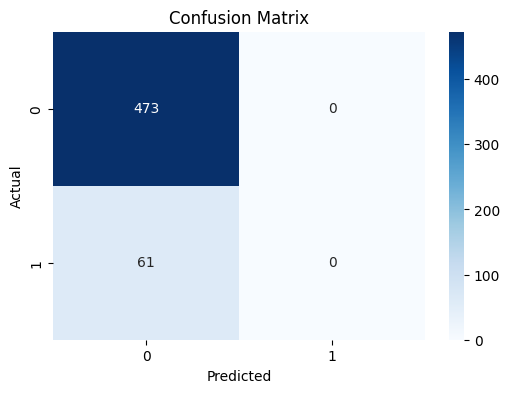

In [17]:
# Create and train the SVM model
svm_classifier = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = evaluate_results(y_test,y_pred_svm)

In [18]:
# Initialize models
svm_linear = SVC(kernel='linear', probability=True)
svm_rbf = SVC(kernel='rbf', probability=True)


In [19]:
# Train models
svm_linear.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

SVC(probability=True)

# 13.Prediction and Evaluation


--- SVM Linear ---
Accuracy: 0.8857677902621723
Precision: 0.0
Recall: 0.0
AUC: 0.7335459051051884
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       473
           1       0.00      0.00      0.00        61

    accuracy                           0.89       534
   macro avg       0.44      0.50      0.47       534
weighted avg       0.78      0.89      0.83       534



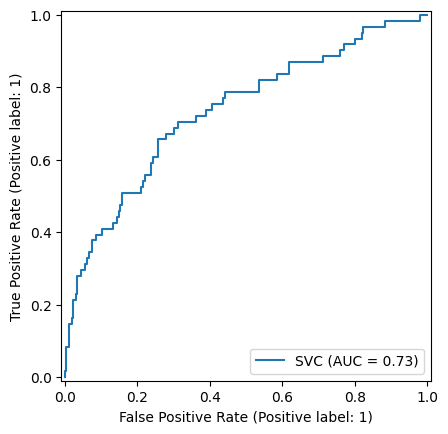

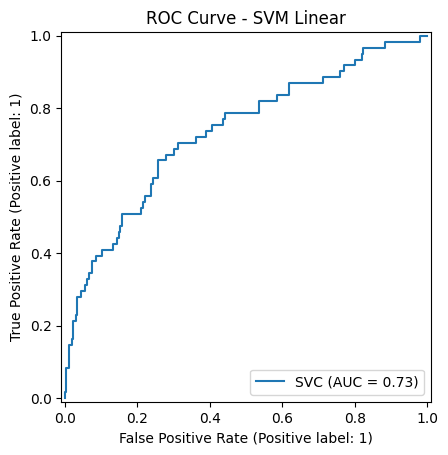


--- SVM RBF ---
Accuracy: 0.9307116104868914
Precision: 0.8529411764705882
Recall: 0.47540983606557374
AUC: 0.9068554396423248
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       473
           1       0.85      0.48      0.61        61

    accuracy                           0.93       534
   macro avg       0.89      0.73      0.79       534
weighted avg       0.93      0.93      0.92       534



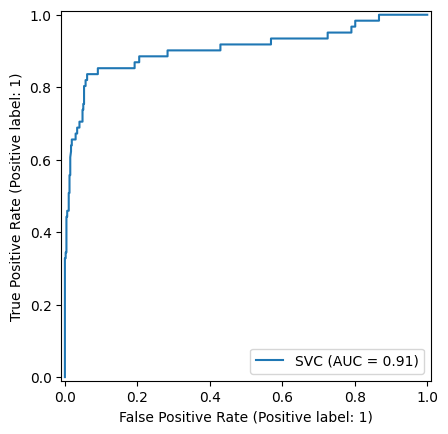

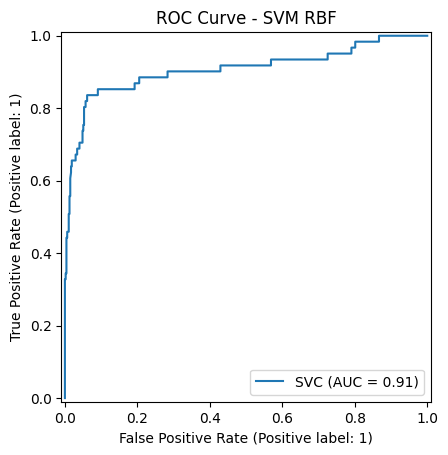

In [20]:
# Predict and evaluate
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_prob))
    print(classification_report(y_test, y_pred))

    # Instead of plot_roc_curve, use RocCurveDisplay
    roc_display = RocCurveDisplay.from_estimator(model, X_test, y_test)
    roc_display.plot()
    plt.title(f"ROC Curve - {model_name}")
    plt.show()

evaluate_model(svm_linear, X_test_scaled, y_test, "SVM Linear")
evaluate_model(svm_rbf, X_test_scaled, y_test, "SVM RBF")

# 14.Visualize decision boundaries

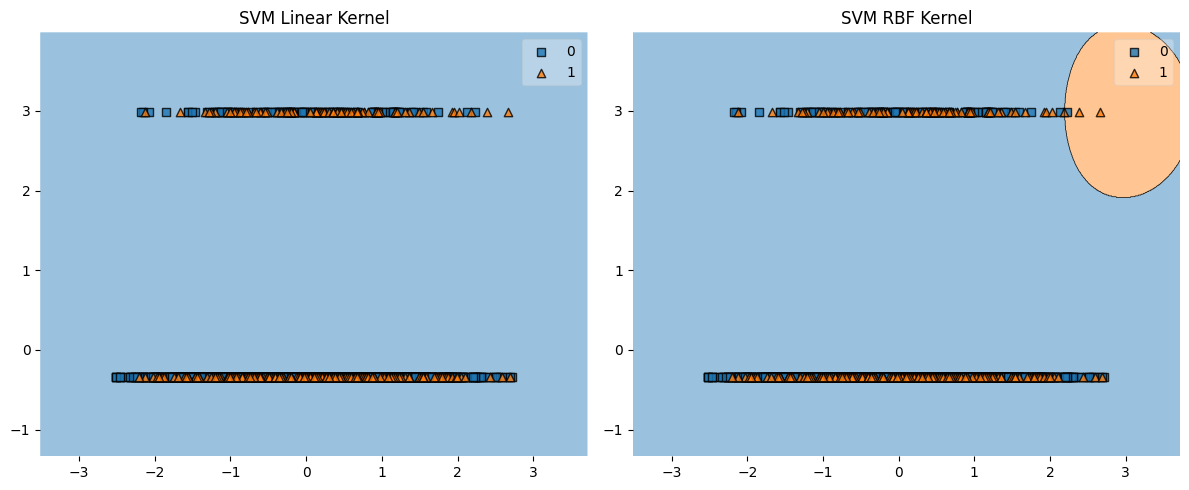

In [21]:
# Select two features for visualization (e.g., the first two)
X_train_selected = X_train_scaled[:, :2]

# Train the model with the selected features
svm_linear.fit(X_train_selected, y_train)

# Define filler values for the remaining features
# Replace ... with appropriate values or ranges for other features
filler_feature_values = {i: X_train_scaled[:, i].mean() for i in range(2, X_train_scaled.shape[1])}
filler_feature_ranges = {i: (X_train_scaled[:, i].min(), X_train_scaled[:, i].max()) for i in range(2, X_train_scaled.shape[1])}

# Plot decision boundaries for the selected features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_regions(X_train_selected, y_train, clf=svm_linear,
                      filler_feature_values=filler_feature_values,
                      filler_feature_ranges=filler_feature_ranges)
plt.title("SVM Linear Kernel")

plt.subplot(1, 2, 2)
# Re-train the svm_rbf model with the selected features before plotting
svm_rbf.fit(X_train_selected, y_train) # This line is added to fix the error
plot_decision_regions(X_train_selected, y_train, clf=svm_rbf,
                      filler_feature_values=filler_feature_values,
                      filler_feature_ranges=filler_feature_ranges)
plt.title("SVM RBF Kernel")

plt.tight_layout()
plt.show()

# 15.visualization Model

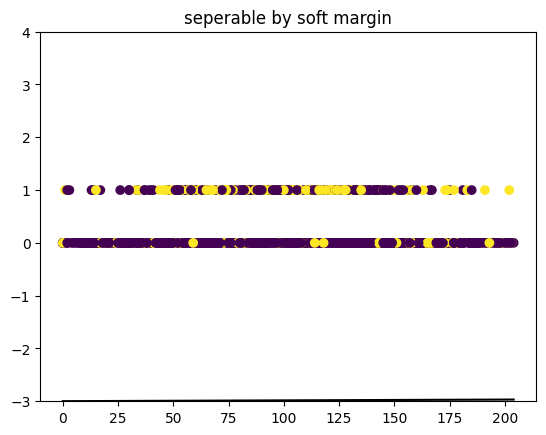

In [22]:
def visualize_svm_model():
    def hyperplane_value(x, w, b, offsets):
        return (-w[0] * x + b + offsets) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    # Access the first and second columns of the DataFrame using their names or indices
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], marker="o", c=y)  # Using iloc for integer-based indexing

    x0_1 = np.amin(X.iloc[:, 0])  # Using iloc for integer-based indexing
    x0_2 = np.amax(X.iloc[:, 0])  # Using iloc for integer-based indexing

    # Accessing the coef_ and intercept_ attributes of the SVC object
    w = svm_classifier.coef_[0]
    b = svm_classifier.intercept_[0]

    x1_1 = hyperplane_value(x0_1, w, b, 0)
    x1_2 = hyperplane_value(x0_2, w, b, 0)

    x1_1_m = hyperplane_value(x0_1, w, b, -1)
    x1_2_m = hyperplane_value(x0_2, w, b, -1)

    x1_1_p = hyperplane_value(x0_1, w, b, 1)
    x1_2_p = hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X.iloc[:, 1])  # Using iloc for integer-based indexing
    x1_max = np.amax(X.iloc[:, 1])  # Using iloc for integer-based indexing

    ax.set_ylim([x1_min - 3, x1_max + 3])
    plt.title('seperable by soft margin')

    plt.show()

visualize_svm_model()

 **Conclusion**:

 In this project, we successfully implemented and evaluated Support Vector Machine (SVM) models using both linear and RBF (Radial Basis Function) kernels for binary classification.

**Final** **Thoughts**:

SVMs are powerful classifiers, particularly well-suited for high-dimensional spaces. The choice of kernel significantly impacts performance—linear for simple relationships, and RBF for capturing non-linear decision boundaries.